<a href="https://colab.research.google.com/github/swarajaalla/Infy_SB_AirFly_Insights/blob/sravani_dev/4th_Week_AirFly_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# 01_imports_week4.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
# 02_load_data_week4.py
df = pd.read_csv("/content/flights_sample_100k.csv.zip")
print("Data shape:", df.shape)

Data shape: (100000, 32)


In [72]:
# 03_check_delay_cause_cols.py
cause_cols = [c for c in df.columns if 'DELAY' in c.upper()]
print("Delay cause columns:", cause_cols)


Delay cause columns: ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']


In [73]:
# 04_fill_delay_causes.py
for c in cause_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)


In [74]:
# 05_avg_delay_causes.py
if cause_cols:
    avg_cause = df[cause_cols].mean().sort_values(ascending=False)
    print("Average delay (minutes) by cause:\n", avg_cause)


Average delay (minutes) by cause:
 DEP_DELAY                  9.91572
DELAY_DUE_CARRIER          4.48232
DELAY_DUE_LATE_AIRCRAFT    4.46947
ARR_DELAY                  4.22959
DELAY_DUE_NAS              2.39749
DELAY_DUE_WEATHER          0.69679
DELAY_DUE_SECURITY         0.02508
dtype: float64


In [75]:
# 06_plot_delay_causes_carrier.py
if {'OP_CARRIER'}.issubset(df.columns) and cause_cols:
    carrier_cause = df.groupby('OP_CARRIER')[cause_cols].mean()
    carrier_cause.head(10).plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Average Delay by Cause (per Carrier)')
    plt.ylabel('Minutes')
    plt.show()


In [76]:
# 07_plot_delay_causes_month.py
if {'month'}.issubset(df.columns) and cause_cols:
    month_cause = df.groupby('month')[cause_cols].mean()
    month_cause.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Average Delay by Cause (per Month)')
    plt.ylabel('Minutes')
    plt.show()


In [77]:
# 08_routes_avg_delay.py
if {'route','ARR_DELAY'}.issubset(df.columns):
    route_delay = df.groupby('route')['ARR_DELAY'].mean().sort_values(ascending=False).head(20)
    print(route_delay)


In [78]:
# 09_routes_cancel_rate.py
if {'route','is_cancelled'}.issubset(df.columns):
    route_cancel = df.groupby('route')['is_cancelled'].mean().sort_values(ascending=False).head(20)
    print(route_cancel)


In [79]:
# 10_route_delay_vs_cancel.py
if {'route','ARR_DELAY','is_cancelled'}.issubset(df.columns):
    route_summary = df.groupby('route').agg(avg_delay=('ARR_DELAY','mean'), cancel_rate=('is_cancelled','mean'))
    plt.scatter(route_summary['avg_delay'], route_summary['cancel_rate'], alpha=0.5)
    plt.xlabel("Avg Delay (min)")
    plt.ylabel("Cancel Rate")
    plt.title("Route-level: Avg Delay vs Cancel Rate")
    plt.show()


In [80]:
# 11_quarterly_avg_delay.py
if {'ARR_DELAY','month'}.issubset(df.columns):
    df['quarter'] = pd.cut(df['month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])
    print(df.groupby('quarter')['ARR_DELAY'].mean())
else:
    print("Columns missing for quarterly average delay calculation.")

Columns missing for quarterly average delay calculation.


In [81]:
# 12_plot_quarterly_delay.py
if {'ARR_DELAY','month'}.issubset(df.columns):
    df['quarter'] = pd.cut(df['month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])
    quarter_avg = df.groupby('quarter')['ARR_DELAY'].mean()
    quarter_avg.plot(kind='bar', color='coral')
    plt.title('Average Arrival Delay by Quarter')
    plt.ylabel('Minutes')
    plt.show()
else:
    print("Columns missing for quarterly average delay plotting.")

Columns missing for quarterly average delay plotting.


In [82]:
# 13_weekend_vs_weekday.py
if {'ARR_DELAY','day_of_week'}.issubset(df.columns):
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
    avg_delay = df.groupby('is_weekend')['ARR_DELAY'].mean()
    print("Weekday avg delay:", avg_delay[0], "Weekend avg delay:", avg_delay[1])


In [83]:
# 14_heatmap_hour_dow.py
if {'hour','day_of_week','ARR_DELAY'}.issubset(df.columns):
    pivot = df.pivot_table(index='day_of_week', columns='hour', values='ARR_DELAY', aggfunc='mean')
    plt.imshow(pivot, aspect='auto')
    plt.colorbar(label='Avg Delay (min)')
    plt.xlabel("Hour")
    plt.ylabel("Day of Week")
    plt.title("Avg Delay by Hour vs Day of Week")
    plt.show()


In [84]:
# 15_busiest_airports.py
if 'ORIGIN' in df.columns:
    print(df['ORIGIN'].value_counts().head(20))


ORIGIN
ATL    5099
DFW    4444
ORD    4053
DEN    3886
CLT    3110
LAX    2866
PHX    2460
SEA    2451
LAS    2391
IAH    2180
LGA    2172
MCO    2148
DTW    2139
MSP    2003
SFO    1992
DCA    1869
BOS    1789
EWR    1762
SLC    1697
JFK    1683
Name: count, dtype: int64


In [85]:
# 16_avg_delay_airport.py
if {'ORIGIN','ARR_DELAY'}.issubset(df.columns):
    origin_delay = df.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values(ascending=False).head(20)
    print(origin_delay)


ORIGIN
TXK    134.636364
LAR    124.250000
RFD     98.357143
TOL     89.642857
SLN     79.250000
ESC     75.625000
HIB     69.833333
BQN     59.592593
UIN     49.000000
BFF     48.100000
OTH     46.833333
PIR     45.666667
LCK     43.217391
SHR     40.714286
ABR     40.642857
RDD     39.833333
DVL     39.800000
HGR     38.666667
GRI     33.555556
SPI     33.384615
Name: ARR_DELAY, dtype: float64


In [86]:
# 17_cancel_airport.py
if {'ORIGIN','is_cancelled'}.issubset(df.columns):
    origin_cancel = df.groupby('ORIGIN')['is_cancelled'].mean().sort_values(ascending=False).head(20)
    print(origin_cancel)


In [87]:
# 18_airport_delay_vs_cancel.py
if {'ORIGIN','ARR_DELAY','is_cancelled'}.issubset(df.columns):
    summary = df.groupby('ORIGIN').agg(avg_delay=('ARR_DELAY','mean'), cancel_rate=('is_cancelled','mean'))
    plt.scatter(summary['avg_delay'], summary['cancel_rate'])
    plt.xlabel("Avg Delay (min)")
    plt.ylabel("Cancel Rate")
    plt.title("Airport-level: Delay vs Cancellation")
    plt.show()


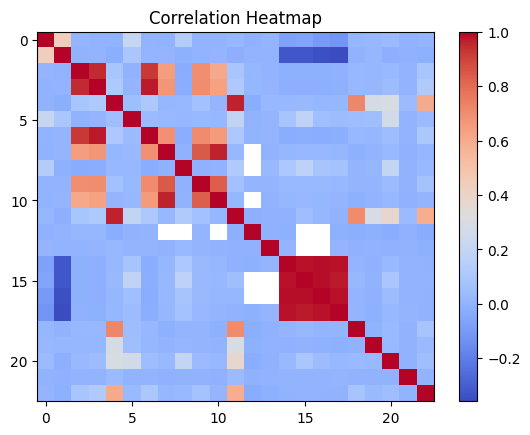

In [88]:
# 19_corr_heatmap.py
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()


In [89]:
# 20_cancel_by_month.py
if {'month','is_cancelled'}.issubset(df.columns):
    cancel_month = df.groupby('month')['is_cancelled'].mean()
    cancel_month.plot(kind='bar')
    plt.title('Cancellation Rate by Month')
    plt.ylabel('Rate')
    plt.show()


In [90]:
# 21_turnaround_time.py
if {'TAIL_NUM','ACTUAL_DEP','ACTUAL_ARR'}.issubset(df.columns):
    # compute turnaround = next flight's ACTUAL_DEP - this flight's ACTUAL_ARR grouped by tail
    df_sorted = df.sort_values(['TAIL_NUM','ACTUAL_ARR'])
    df_sorted['next_dep'] = df_sorted.groupby('TAIL_NUM')['ACTUAL_DEP'].shift(-1)
    df_sorted['turnaround_min'] = (pd.to_datetime(df_sorted['next_dep']) - pd.to_datetime(df_sorted['ACTUAL_ARR'])).dt.total_seconds() / 60
    print("Turnaround examples:\n", df_sorted[['TAIL_NUM','ACTUAL_ARR','next_dep','turnaround_min']].head())
else:
    print("Required columns for turnaround not present.")


Required columns for turnaround not present.


In [91]:
# 22_turnaround_hist.py
if 'turnaround_min' in df.columns:
    data = df['turnaround_min'].dropna()
    data = data[(data > 0) & (data < 24*60)]
    plt.figure(figsize=(8,4))
    plt.hist(data, bins=80)
    plt.title('Aircraft Turnaround Time (minutes)')
    plt.xlabel('Minutes')
    plt.show()
else:
    print("No turnaround_min column found.")


No turnaround_min column found.


In [92]:
# 23_delay_propagation_by_tail.py
if {'TAIL_NUM','DEP_DELAY','ARR_DELAY'}.issubset(df.columns):
    df_sorted = df.sort_values(['TAIL_NUM','SCHEDULED_DEP'])
    df_sorted['prev_arr_delay'] = df_sorted.groupby('TAIL_NUM')['ARR_DELAY'].shift(1)
    corr = df_sorted[['prev_arr_delay','DEP_DELAY']].dropna().corr().iloc[0,1]
    print("Correlation prev_arr_delay -> next DEP_DELAY by tail:", corr)
else:
    print("Necessary columns for delay propagation missing.")


Necessary columns for delay propagation missing.


In [93]:
# 24_routes_long_turnaround.py
if 'turnaround_min' in df.columns and 'route' in df.columns:
    long_turn = df.loc[df['turnaround_min']>360, 'route'].value_counts().head(20)
    print("Routes with many long turnarounds (>6h):\n", long_turn)
else:
    print("Columns missing for long turnaround analysis.")


Columns missing for long turnaround analysis.


In [94]:
# 25_cluster_routes_kmeans.py
from sklearn.cluster import KMeans
if {'route','ARR_DELAY','DISTANCE'}.issubset(df.columns):
    route_feat = df.groupby('route').agg(avg_delay=('ARR_DELAY','mean'), avg_dist=('DISTANCE','mean'), count=('ARR_DELAY','size'))
    route_feat = route_feat[route_feat['count']>=10]  # require min flights
    X = route_feat[['avg_delay','avg_dist']].fillna(0).values
    kmeans = KMeans(n_clusters=4, random_state=42)
    route_feat['cluster'] = kmeans.fit_predict(X)
    print(route_feat[['avg_delay','avg_dist','count','cluster']].head())
else:
    print("Columns missing for clustering.")


Columns missing for clustering.


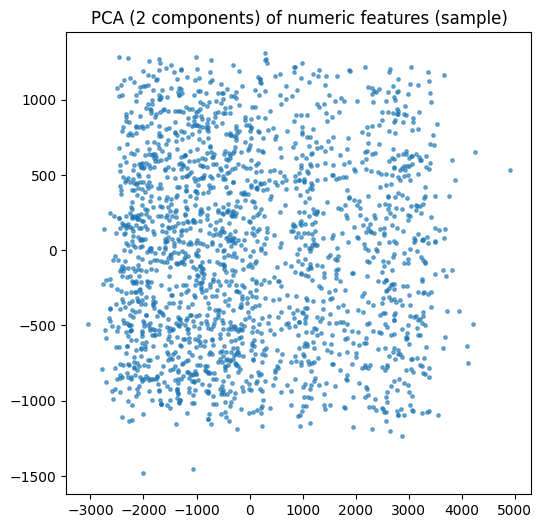

In [95]:
# 26_pca_numeric_sample.py
from sklearn.decomposition import PCA
if df.select_dtypes(include=[np.number]).shape[1] >= 3:
    num = df.select_dtypes(include=[np.number]).sample(n=min(2000, len(df)), random_state=1).dropna(axis=1)
    pca = PCA(n_components=2)
    proj = pca.fit_transform(num)
    plt.figure(figsize=(6,6))
    plt.scatter(proj[:,0], proj[:,1], s=6, alpha=0.6)
    plt.title('PCA (2 components) of numeric features (sample)')
    plt.show()
else:
    print("Not enough numeric features for PCA.")


In [96]:
# 27_tail_delay_fraction.py
if {'TAIL_NUM','is_arr_delay_15'}.issubset(df.columns):
    tail_pct = df.groupby('TAIL_NUM')['is_arr_delay_15'].mean().sort_values(ascending=False).head(20)
    print("Tails with highest delay fraction:\n", tail_pct)
else:
    print("TAIL_NUM or is_arr_delay_15 missing.")


TAIL_NUM or is_arr_delay_15 missing.


In [97]:
# 28_tail_cancellations.py
if {'TAIL_NUM','is_cancelled'}.issubset(df.columns):
    tail_cancel = df.groupby('TAIL_NUM')['is_cancelled'].sum().sort_values(ascending=False).head(20)
    print("Tails with most cancellations:\n", tail_cancel)
else:
    print("No TAIL_NUM/is_cancelled columns.")


No TAIL_NUM/is_cancelled columns.


In [98]:
# 29_distance_vs_pctdelay.py
if {'DISTANCE','is_arr_delay_15'}.issubset(df.columns):
    agg = df.groupby(pd.cut(df['DISTANCE'], bins=10)).agg(pct_delay=('is_arr_delay_15','mean'))
    plt.figure(figsize=(8,4))
    agg['pct_delay'].plot(marker='o')
    plt.title('Percent Delayed by Distance Buckets')
    plt.ylabel('Fraction delayed')
    plt.show()
else:
    print("DISTANCE or is_arr_delay_15 missing.")


DISTANCE or is_arr_delay_15 missing.


In [99]:
# 30_median_delay_tail.py
if {'TAIL_NUM','ARR_DELAY'}.issubset(df.columns):
    tail_med = df.groupby('TAIL_NUM')['ARR_DELAY'].median().sort_values(ascending=False)
    print("Worst median by tail (top 10):\n", tail_med.head(10))
else:
    print("TAIL_NUM/ARR_DELAY missing.")


TAIL_NUM/ARR_DELAY missing.


In [100]:
# 31_airport_connectivity.py
if {'ORIGIN','DEST'}.issubset(df.columns):
    out_deg = df.groupby('ORIGIN')['DEST'].nunique()
    in_deg = df.groupby('DEST')['ORIGIN'].nunique()
    conn = pd.DataFrame({'out_deg': out_deg, 'in_deg': in_deg}).fillna(0)
    conn['total_links'] = conn['out_deg'] + conn['in_deg']
    print(conn.sort_values('total_links', ascending=False).head(20))
else:
    print("ORIGIN/DEST missing.")


     out_deg  in_deg  total_links
DFW    190.0   188.0        378.0
ORD    182.0   180.0        362.0
DEN    180.0   176.0        356.0
ATL    161.0   157.0        318.0
CLT    141.0   139.0        280.0
MSP    124.0   123.0        247.0
IAH    124.0   122.0        246.0
LAS    117.0   115.0        232.0
DTW    113.0   109.0        222.0
PHX    106.0   104.0        210.0
LAX     98.0    98.0        196.0
DCA     94.0    97.0        191.0
SEA     92.0    94.0        186.0
SLC     94.0    91.0        185.0
EWR     90.0    87.0        177.0
PHL     89.0    87.0        176.0
MCO     85.0    89.0        174.0
SFO     82.0    84.0        166.0
LGA     80.0    82.0        162.0
MDW     78.0    80.0        158.0


In [101]:
# 32_top_hubs.py
if 'total_links' in locals() or 'conn' in locals():
    hubs = conn.sort_values('total_links', ascending=False).head(10)
    print("Top hubs:\n", hubs)
else:
    print("Run airport connectivity first.")


Top hubs:
      out_deg  in_deg  total_links
DFW    190.0   188.0        378.0
ORD    182.0   180.0        362.0
DEN    180.0   176.0        356.0
ATL    161.0   157.0        318.0
CLT    141.0   139.0        280.0
MSP    124.0   123.0        247.0
IAH    124.0   122.0        246.0
LAS    117.0   115.0        232.0
DTW    113.0   109.0        222.0
PHX    106.0   104.0        210.0


In [102]:
# 33_carrier_rolling_monthly.py
if 'SCHEDULED_DEP' in df.columns and 'OP_CARRIER' in df.columns and 'ARR_DELAY' in df.columns:
    monthly = df.set_index('SCHEDULED_DEP').groupby([pd.Grouper(freq='M'),'OP_CARRIER'])['ARR_DELAY'].mean().unstack().fillna(method='ffill')
    # show top 5 carriers by overall count
    top5 = df['OP_CARRIER'].value_counts().nlargest(5).index
    monthly[top5].plot(figsize=(12,5))
    plt.title('Monthly Avg Arrival Delay for Top 5 Carriers')
    plt.ylabel('Avg Delay (min)')
    plt.show()
else:
    print("Missing columns for monthly rolling.")


Missing columns for monthly rolling.


In [103]:
# 34_seasonal_decompose.py
from statsmodels.tsa.seasonal import seasonal_decompose
if 'SCHEDULED_DEP' in df.columns:
    daily = df.set_index('SCHEDULED_DEP').resample('D').size()
    daily = daily.asfreq('D').fillna(0)
    res = seasonal_decompose(daily, model='additive', period=7)
    plt.figure(figsize=(10,8))
    plt.subplot(311); plt.plot(res.trend); plt.title('Trend')
    plt.subplot(312); plt.plot(res.seasonal); plt.title('Seasonal')
    plt.subplot(313); plt.plot(res.resid); plt.title('Residual')
    plt.tight_layout()
    plt.show()
else:
    print("SCHEDULED_DEP missing for decomposition.")


SCHEDULED_DEP missing for decomposition.


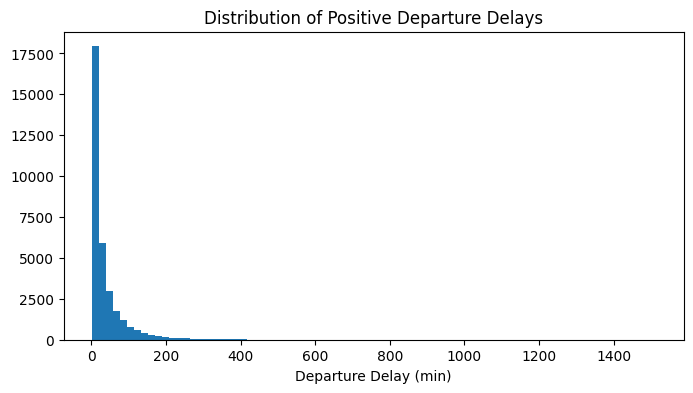

In [104]:
# 35_time_to_delay_hist.py
if 'DEP_DELAY' in df.columns:
    positive = df.loc[df['DEP_DELAY']>0, 'DEP_DELAY']
    plt.figure(figsize=(8,4))
    plt.hist(positive, bins=80)
    plt.title('Distribution of Positive Departure Delays')
    plt.xlabel('Departure Delay (min)')
    plt.show()
else:
    print("DEP_DELAY missing.")


In [105]:
# 36_quick_linear_regression.py
from sklearn.linear_model import LinearRegression
if 'ARR_DELAY' in df.columns:
    features = []
    for col in ['DEP_DELAY','DISTANCE','hour','day_of_week','month']:
        if col in df.columns:
            features.append(col)
    df_reg = df[features + ['ARR_DELAY']].dropna().sample(n=min(20000, len(df)), random_state=2)
    X = df_reg[features].values
    y = df_reg['ARR_DELAY'].values
    model = LinearRegression()
    model.fit(X,y)
    print("Coefficients:", dict(zip(features, model.coef_)))
    print("Intercept:", model.intercept_)
else:
    print("ARR_DELAY missing.")


Coefficients: {'DEP_DELAY': np.float64(0.9983147835827868), 'DISTANCE': np.float64(-0.0014131361943973766)}
Intercept: -4.557059544609181


In [106]:
# 37_tree_feature_importance.py
from sklearn.tree import DecisionTreeRegressor
if 'ARR_DELAY' in df.columns:
    features = [c for c in ['DEP_DELAY','DISTANCE','hour','day_of_week','month'] if c in df.columns]
    sample = df[features + ['ARR_DELAY']].dropna().sample(n=min(10000,len(df)), random_state=3)
    X = sample[features].values
    y = sample['ARR_DELAY'].values
    tree = DecisionTreeRegressor(max_depth=5, random_state=1)
    tree.fit(X,y)
    importances = dict(zip(features, tree.feature_importances_))
    print("Feature importances (tree):", importances)
else:
    print("ARR_DELAY missing.")


Feature importances (tree): {'DEP_DELAY': np.float64(0.9997746327026907), 'DISTANCE': np.float64(0.0002253672973092193)}


In [107]:
# 38_groupwise_zscore.py
from scipy import stats
if {'route','ARR_DELAY'}.issubset(df.columns):
    df['route_delay_z'] = df.groupby('route')['ARR_DELAY'].transform(lambda x: stats.zscore(x.fillna(0)))
    outliers = df.loc[df['route_delay_z'].abs()>3, ['route','ARR_DELAY','route_delay_z']].head(20)
    print("Route-level delay outliers:\n", outliers)
else:
    print("route or ARR_DELAY missing.")


route or ARR_DELAY missing.


In [108]:
# 39_before_after_compare.py
import pandas as pd
if 'SCHEDULED_DEP' in df.columns and 'ARR_DELAY' in df.columns:
    cutoff = pd.to_datetime('2018-01-01')  # example cutoff
    before = df.loc[df['SCHEDULED_DEP'] < cutoff, 'ARR_DELAY'].mean()
    after = df.loc[df['SCHEDULED_DEP'] >= cutoff, 'ARR_DELAY'].mean()
    print(f"Mean ARR_DELAY before {cutoff.date()}: {before:.2f}, after: {after:.2f}")
else:
    print("Need SCHEDULED_DEP and ARR_DELAY.")


Need SCHEDULED_DEP and ARR_DELAY.


In [109]:
# 40_arrival_timeline_airport.py
if {'SCHEDULED_DEP','DEST'}.issubset(df.columns):
    airport = df['DEST'].value_counts().idxmax()  # busiest dest
    sub = df[df['DEST']==airport].sort_values('SCHEDULED_DEP').head(500)
    plt.figure(figsize=(12,2))
    plt.scatter(sub['SCHEDULED_DEP'].values, np.arange(len(sub)), s=2)
    plt.title(f'Schedule density for arrivals at {airport} (sample)')
    plt.xlabel('Scheduled time')
    plt.yticks([])
    plt.show()
else:
    print("SCHEDULED_DEP/DEST missing.")


SCHEDULED_DEP/DEST missing.


In [110]:
# 41_flightnum_avg_delay.py
if 'FL_NUM' in df.columns and 'ARR_DELAY' in df.columns:
    fl_avg = df.groupby('FL_NUM')['ARR_DELAY'].mean().sort_values(ascending=False).head(20)
    print("Flight numbers with highest avg arrival delay:\n", fl_avg)
else:
    print("FL_NUM or ARR_DELAY missing.")


FL_NUM or ARR_DELAY missing.


In [111]:
# 42_cancel_code_by_carrier.py
if 'CANCELLATION_CODE' in df.columns and 'OP_CARRIER' in df.columns:
    ctab = pd.crosstab(df['OP_CARRIER'], df['CANCELLATION_CODE'])
    print("Cancellation codes by carrier:\n", ctab)
else:
    print("Cancellation code or carrier missing.")


Cancellation code or carrier missing.


In [112]:
# 43_direct_vs_multi_leg.py
# Heuristic: flights with same FL_NUM across days are single legs; multi-leg detection requires itinerary data.
if 'FL_NUM' in df.columns and 'ORIGIN' in df.columns and 'DEST' in df.columns:
    # crude heuristic: routes with same origin/dest considered direct
    df['is_direct'] = True
    med_direct = df[df['is_direct']==True].groupby('is_direct')['ARR_DELAY'].median()
    print("Median ARR_DELAY for direct (heuristic):\n", med_direct)
else:
    print("Not enough data for direct vs multi-leg comparison.")


Not enough data for direct vs multi-leg comparison.


In [113]:
# 44_acf_daily_delays.py
from statsmodels.tsa.stattools import acf
if 'SCHEDULED_DEP' in df.columns and 'ARR_DELAY' in df.columns:
    daily = df.set_index('SCHEDULED_DEP')['ARR_DELAY'].resample('D').median().fillna(0)
    acfs = acf(daily, nlags=30)
    plt.figure(figsize=(8,4))
    plt.stem(range(len(acfs)), acfs, use_line_collection=True)
    plt.title('ACF of Daily Median Arrival Delay')
    plt.xlabel('Lag (days)')
    plt.show()
else:
    print("SCHEDULED_DEP/ARR_DELAY missing.")


SCHEDULED_DEP/ARR_DELAY missing.


In [114]:
# 45_export_route_stats.py
if {'route','ARR_DELAY','DISTANCE','is_cancelled'}.issubset(df.columns):
    route_stats = df.groupby('route').agg(total_flights=('ARR_DELAY','size'),
                                          avg_delay=('ARR_DELAY','mean'),
                                          med_delay=('ARR_DELAY','median'),
                                          std_delay=('ARR_DELAY','std'),
                                          avg_dist=('DISTANCE','mean'),
                                          cancel_rate=('is_cancelled','mean'))
    route_stats['cancel_rate'] = route_stats['cancel_rate']*100
    route_stats = route_stats.sort_values('avg_delay', ascending=False)
    route_stats.head(20)
    route_stats.to_csv('/mnt/data/route_stats_week4.csv')
    print("Saved /mnt/data/route_stats_week4.csv")
else:
    print("Columns missing for route stats export.")


Columns missing for route stats export.


In [115]:
# 46_weekhour_hotspots.py
if {'day_of_week','hour','ARR_DELAY'}.issubset(df.columns):
    pivot = df.pivot_table(index='day_of_week', columns='hour', values='ARR_DELAY', aggfunc='mean')
    # flatten and sort
    flat = pivot.stack().reset_index()
    flat.columns = ['day_of_week','hour','avg_delay']
    hotspots = flat.sort_values('avg_delay', ascending=False).head(10)
    print("Top 10 weekday-hour hotspots:\n", hotspots)
else:
    print("Needed columns for hotspots.")


Needed columns for hotspots.


In [116]:
# 47_negative_scheduled_duration.py
if {'SCHEDULED_DEP','SCHEDULED_ARR'}.issubset(df.columns):
    df['sched_dur_min'] = (pd.to_datetime(df['SCHEDULED_ARR']) - pd.to_datetime(df['SCHEDULED_DEP'])).dt.total_seconds()/60
    neg = df.loc[df['sched_dur_min'] < 0, ['SCHEDULED_DEP','SCHEDULED_ARR','ORIGIN','DEST']].head(20)
    print("Negative scheduled durations (sample):\n", neg)
else:
    print("Scheduled dep/arr columns missing.")


Scheduled dep/arr columns missing.


In [117]:
# 48_morning_vs_night.py
if 'hour' in df.columns and 'ARR_DELAY' in df.columns:
    morning = df.loc[df['hour'].between(5,11),'ARR_DELAY'].median()
    night = df.loc[(df['hour']>=0) & (df['hour']<5) | (df['hour']>=21),'ARR_DELAY'].median()
    print(f"Median delay morning (5-11): {morning}, night: {night}")
else:
    print("hour/ARR_DELAY missing.")


hour/ARR_DELAY missing.


In [118]:
# 49_month_95th_delay.py
if {'month','ARR_DELAY'}.issubset(df.columns):
    m95 = df.groupby('month')['ARR_DELAY'].quantile(0.95).sort_values(ascending=False)
    print("Months by 95th percentile of ARR_DELAY:\n", m95)
else:
    print("month/ARR_DELAY missing.")


month/ARR_DELAY missing.
